In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [ ]:
(ds_train, ds_test) , info = tfds.load('mnist', shuffle_files=True, as_supervised=True, with_info= True, split=['train','test'])

#Alternatively, dont have to indicate split and use do this instead (replace ds_train and ds_test with dataset)
#train_dataset, test_dataset = dataset['train'], dataset['test']


In [ ]:
def preprocess(feature, label):
  feature = tf.cast(feature, tf.float32) / 255.
  return feature, label

In [ ]:
info.splits['train'].num_examples

60000

In [ ]:
print(info.features['image'])
print(info.features['label'])

Image(shape=(28, 28, 1), dtype=tf.uint8)
ClassLabel(shape=(), dtype=tf.int64, num_classes=10)


In [ ]:
ds_train = ds_train.map(preprocess,num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
ds_test = ds_test.map(preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test  = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
eg = ds_train.take(1)
#Since as_supervised = True, returns a tuple of (feature, label)
for feature, label in eg:
  print(feature.shape)

(128, 28, 28, 1)


In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['accuracy'])

In [40]:
batch = 0
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy')> 0.999):
      print('\n 99.9% Accuracy reached')
      self.model.stop_training = True

In [41]:
callbk = myCallback()

hist = model.fit(ds_train, validation_data=ds_test, epochs=20, callbacks=[callbk] )

Epoch 1/20
451/469 [===========================>..] - ETA: 0s - loss: 4.6107e-04 - accuracy: 1.0000
 99.9% Accuracy reached
469/469 [==============================] - 1s 2ms/step - loss: 4.6268e-04 - accuracy: 1.0000 - val_loss: 0.0915 - val_accuracy: 0.9786


In [ ]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

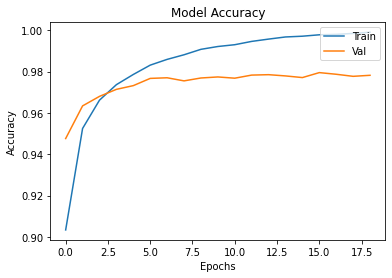

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

NameError: ignored